# Time Series Forecasting with HoltWinters Model in Python.

Time series is a any sequece of data recorded over a certain regular period of time. Time series is used to forecasting time-dependent data. There are different statistical methods like ARIMA, SARIMAX ,HoltWinters, and deep learning neural network like LSTM. In this notebook, we'll use HoltWinters model.

### Importing the libraries 

In [ ]:
import pandas as pd
import numpy as np
import statsmodels
from math import sqrt
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pandas.plotting import autocorrelation_plot
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

### Reading in and exploring the data.

In [2]:
data = pd.read_csv('portland-oregon-average-monthly-.csv')

In [3]:
data.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [4]:
data.shape

(115, 2)

In [5]:
data.tail()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327
114,Portland Oregon average monthly bus ridership ...,n=114


In [6]:
#  Changing the column names for readability

data.columns = ['Month', 'Riders']

In [7]:
data.head()

,Month,Riders
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [8]:
data.dtypes

Month     object
Riders    object
dtype: object

In [9]:
# Checking the lower end of the table, 
# we found out that the last cell is not a number or data point, 
# so we have to drop that cell.

data.tail()

,Month,Riders
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327
114,Portland Oregon average monthly bus ridership ...,n=114


In [10]:
data.drop(114, axis=0, inplace=True)

In [11]:
# The time or date is very important in time series forecasting.
# We need to convert the date column which is 'month' in this case from object datatype to date object.

data['Riders'] = data['Riders'].astype('int')
data['Month'] = pd.to_datetime(data['Month'])

In [12]:
data.dtypes

Month     datetime64[ns]
Riders             int32
dtype: object

In [13]:
# We need to set the month as the index. This is important in time series. 

data.set_index('Month', inplace=True)

In [14]:
data.shape

(114, 1)

In [15]:
data.head()

,Riders
Month,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630


In [16]:
data.describe()

,Riders
count,114.000000
mean,1120.543860
std,270.888317
min,613.000000
25%,885.000000
50%,1158.000000
75%,1340.000000
max,1558.000000


### Visualize the data in a plot and also use seasonal decompose library to separate the trend and seasonality in the data if any. 

<AxesSubplot:xlabel='Month'>

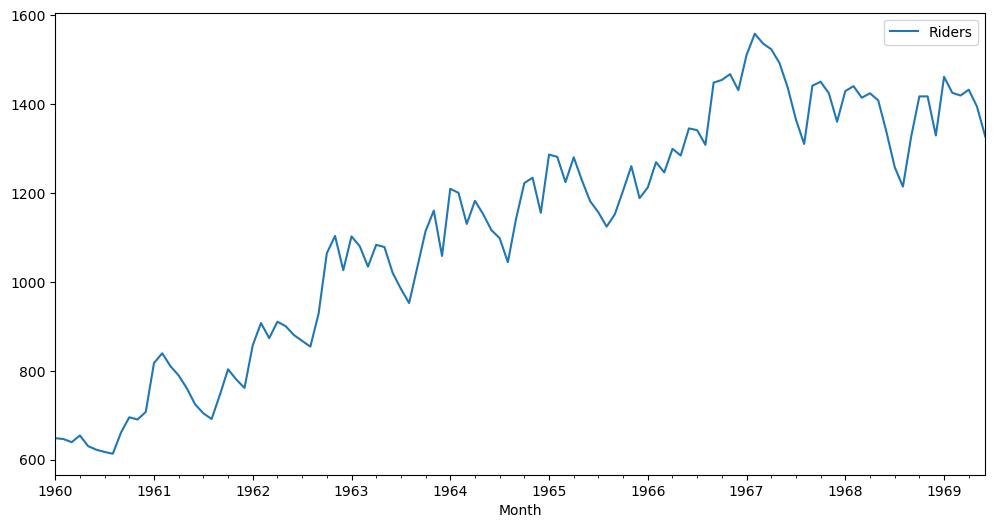

In [17]:
data.plot(figsize=(12,6))

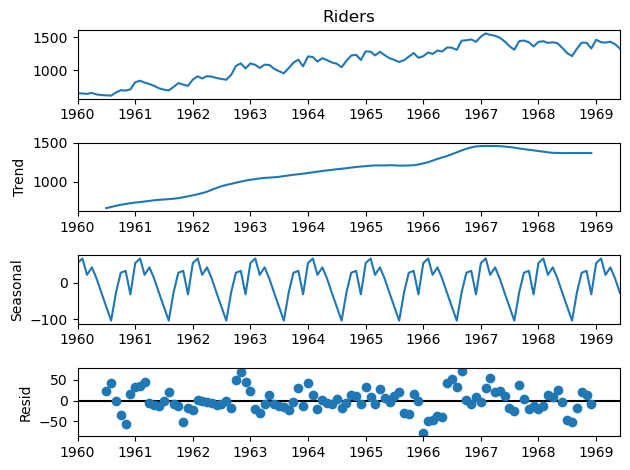

In [18]:
results = seasonal_decompose(data['Riders']);
results.plot();    

In [19]:
# We'll split the data into train and test

train = data.iloc[:102]
test = data.iloc[102:]

In [20]:
train.tail()

,Riders
Month,
1968-02-01,1440
1968-03-01,1414
1968-04-01,1424
1968-05-01,1408
1968-06-01,1337


In [21]:
test.head()

,Riders
Month,
1968-07-01,1258
1968-08-01,1214
1968-09-01,1326
1968-10-01,1417
1968-11-01,1417


In [22]:
len(test)

12

### Build HoltWinters Model

In [23]:
holt_model = ExponentialSmoothing(train.Riders, trend='add', seasonal='mul', seasonal_periods=12)
model = holt_model.fit()

C:\Users\Surface\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [24]:
# Predict test data with the model.

test_pred = model.forecast(12)

In [25]:
test_pred

1968-07-01    1304.198569
1968-08-01    1265.053139
1968-09-01    1364.708902
1968-10-01    1427.114022
1968-11-01    1449.919723
1968-12-01    1373.020464
1969-01-01    1479.991825
1969-02-01    1508.109351
1969-03-01    1459.749500
1969-04-01    1490.821639
1969-05-01    1461.494627
1969-06-01    1422.395513
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

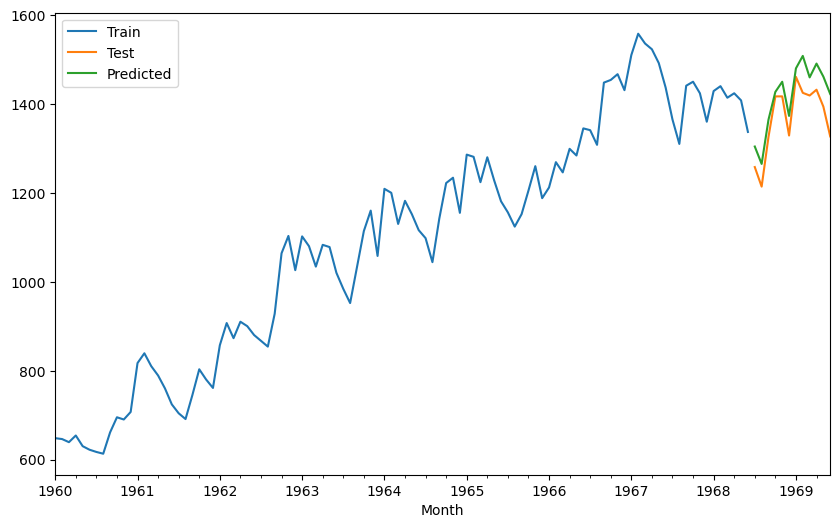

In [26]:
# Here , we are plotting the train data along with the test data and the predicted result.

train['Riders'].plot(legend=True, label='Train', figsize=(10,6))
test['Riders'].plot(legend=True, label='Test')
test_pred.plot(legend=True, label='Predicted')

In [27]:
# Evaluating the error with the square root of the mean squared error

eval_error = np.sqrt(mean_squared_error(test, test_pred))
eval_error

54.31935040196764

In [28]:
#  Checking the standard deviation of the data

stdev = np.sqrt(data.Riders.var())
stdev

270.8883171349265

In [29]:
data.Riders.mean(), stdev, eval_error

(1120.5438596491229, 270.8883171349265, 54.31935040196764)

### Comparing the error to the standard deviation , we found that the error is way less than the standard deviation from the mean

# Final model

#### Finally, we are fitting the model on the whole data and predicting the number of riders for the next 24 months.

In [30]:
final_model = ExponentialSmoothing(data.Riders, trend='add', seasonal='mul', seasonal_periods=12).fit()

C:\Users\Surface\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [31]:
# final_model.fit()

In [34]:
pred = final_model.forecast(24)
pred


1969-07-01    1289.784853
1969-08-01    1252.029486
1969-09-01    1356.474822
1969-10-01    1424.165649
1969-11-01    1440.780959
1969-12-01    1365.124091
1970-01-01    1476.854025
1970-02-01    1493.236022
1970-03-01    1453.952399
1970-04-01    1483.288201
1970-05-01    1452.722038
1970-06-01    1409.423981
1970-07-01    1367.229538
1970-08-01    1326.832868
1970-09-01    1437.116862
1970-10-01    1508.414509
1970-11-01    1525.594617
1970-12-01    1445.091813
1971-01-01    1562.946516
1971-02-01    1579.862672
1971-03-01    1537.894292
1971-04-01    1568.513724
1971-05-01    1535.793561
1971-06-01    1489.637338
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

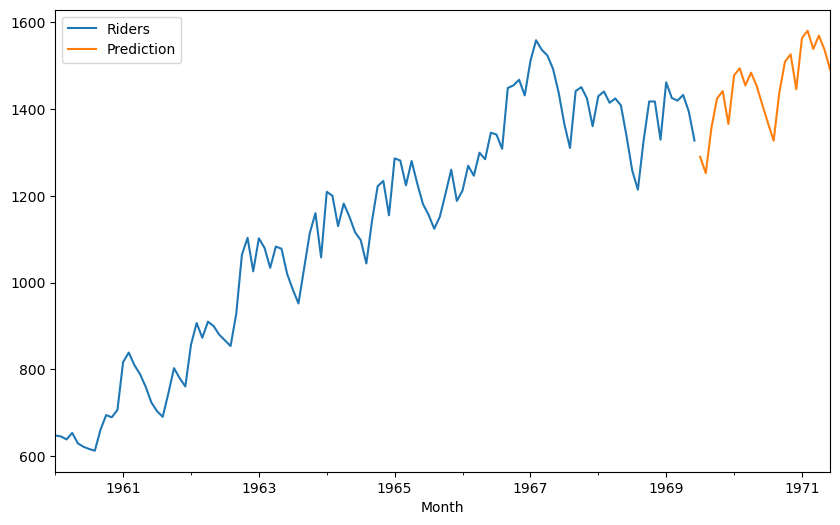

In [35]:
#  Plotting the data and the new prediction for the next 24 months.

data['Riders'].plot(legend=True, label='Riders', figsize=(10,6))
pred.plot(legend=True, label='Prediction')

### Our model was able to capture the seasonality and trend in the data.